######Predict if the Customer will exit from the Bank

In [0]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Reading the dataset
dataset=pd.read_csv('/content/17ANNChurn_Modelling_Data.csv')

In [3]:
#View the loaded dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Check the shape of dataset
dataset.shape

(10000, 14)

In [0]:
#Independent Variables--->X----> We are considering only the columns from CreditScore until EstimatedSalary
#Dependent Variable---->y-----> The Exited Column
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13].values

In [6]:
#View the independednt variables
X
type(X)

pandas.core.frame.DataFrame

In [7]:
#View the depnedent variable
y
type(y)

numpy.ndarray

In [0]:
#Create dummy variables for Geography and Gender Columns
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
#Check what is present in geography
#This will contain Geography column data after removing one dummy variable
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
#Check what is present in gender
#This will contain Gender column data after removing one dummy variable
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
#The shape of original dataset has not changed yet
dataset.shape

(10000, 14)

In [12]:
#Check the shape of independent variables
#This also doesn't change
X.shape

(10000, 10)

In [0]:
#Concat the columns containing the dummy variables to the existing independent variable X
X=pd.concat([X,geography,gender],axis=1)

In [14]:
#View the shape of X
#It should contain more columns than the original as we added the dummy variables
X.shape

(10000, 13)

In [15]:
#View modified X
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [0]:
#Now, we should drop the original Geography column and Gender Column
X=X.drop(['Geography','Gender'],axis=1)

In [17]:
#Now check the shape of X
X.shape

(10000, 11)

In [18]:
#VIew X
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [0]:
#Create train test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [20]:
 #Check the shape of X_train
 X_train.shape
 type(X_train)

pandas.core.frame.DataFrame

In [21]:
 #Check the shape of y_train
 y_train.shape
 type(y_train)

numpy.ndarray

In [22]:
 #Check the shape of X_test
 X_test.shape
 type(X_test)

pandas.core.frame.DataFrame

In [23]:
 #Check the shape of y_test
 y_test.shape
 type(y_test)

numpy.ndarray

In [0]:
#Feature Scaling
#We need feature Scaling because if magnitude of the inputs is a high number
#It takes more time to multiply the weights to inputs
#So, we should scale down the feature to a same scale range
#The multiplication happens quickly
#Also, during teh back propagation calculative derivative of weights for a smaller number takes lesser time relatively
#Due to this scaling, the convergence happens quickly

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [25]:
#View X_train to see if scaling happenned
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [26]:
#View X_test to see if scaling happenned
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

####Create ANN

In [27]:
#import libraries required for creating ANN
import keras

#Need to import sequential irrespective of what Neural Network are you creating. Let it be ANN,CNN or RNN
from keras.models import Sequential

#Need to import Dense to add hidden layers to the Neural Network
from keras.layers import Dense

#Need to import below for the Activation functions
#from keras.layers import LeakyRelu,PRelu,ELU

#To use Dropout
#Dropout is a regularization parameter
#Dropout is used whenever the Neural Network is quite Deep
from keras.layers import Dropout

Using TensorFlow backend.


In [28]:
#Initialize the ANN
classifier=Sequential()
#This will be an empty Neural Network currently


In [29]:
#####We are increasing the number of neurons in the hiddden layers
#####We are also adding third hidden layer
#####We are applying dropout at every layer
#We will use Dense layer to create the first hidden layer
#init is Initialization parameter ---> This indicates how the weights needs to be initialized
#activation=relu ----> Whenever we are using relu activation function, the weight initialization he_uniform/he_normal works well
#input_dim is the number of input features that we are giving to the Neural Network X1,X2,X3,X4,X5.........
#All the hidden layers should have Relu or LeakyRelu activation functions

#Input Layer and First Hidden Layer
#We are increasing the neurons in hidden layer to 10
classifier.add(Dense(output_dim=10,init='he_normal',activation='relu',input_dim=11))

#Adding dropout layer
classifier.add(Dropout(0.3))

#Adding the second hidden layer
classifier.add(Dense(output_dim=20,init='he_normal',activation='relu'))

#Adding dropout layer
classifier.add(Dropout(0.4))

#Adding the third hidden layer
classifier.add(Dense(output_dim=15,init='he_normal',activation='relu'))

#Adding dropout layer
classifier.add(Dropout(0.2))


#Adding the output layer
classifier.add(Dense(output_dim=1,init='glorot_uniform',activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=10, kernel_initializer="he_normal")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="he_normal")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="he_normal")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`


In [30]:
#Compile the ANN
#loss='binary_crossentropy' whenever the output is either zero or one
#loss='category_crossentropy' whenever the output is multiple categories
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
#Fitting ANN to the training dataset
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=100)
#The accuracy improved when the number of hidden layers is increased from two to three




Train on 5600 samples, validate on 2400 samples
Epoch 1/100





5600/5600 [==============================] - 2s 319us/step - loss: 0.7449 - acc: 0.6773 - val_loss: 0.5021 - val_acc: 0.7958
Epoch 2/100
5600/5600 [==============================] - 1s 179us/step - loss: 0.5361 - acc: 0.7818 - val_loss: 0.4829 - val_acc: 0.7967
Epoch 3/100
5600/5600 [==============================] - 1s 180us/step - loss: 0.5008 - acc: 0.7930 - val_loss: 0.4722 - val_acc: 0.7962
Epoch 4/100
5600/5600 [==============================] - 1s 185us/step - loss: 0.4862 - acc: 0.7934 - val_loss: 0.4633 - val_acc: 0.7971
Epoch 5/100
5600/5600 [==============================] - 1s 186us/step - loss: 0.4744 - acc: 0.7998 - val_loss: 0.4524 - val_acc: 0.7983
Epoch 6/100
5600/5600 [==============================] - 1s 185us/step - loss: 0.4606 - acc: 0.7962 - val_loss: 0.4460 - val_acc: 0.7979
Epoch 7/100
5600/5600 [==============================] - 1s 183us/step - loss: 0.4613 - acc: 0.7993 - val_loss: 0.4436 - v

In [32]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

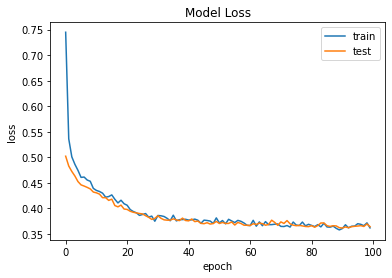

In [33]:
#Plot the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [0]:
#Predicting the test results
y_pred=classifier.predict(X_test)

In [0]:
#Consider only those values where y_pred>0.5
#These are the customers who are deemed as planning to exit from the bank according to our model
y_pred=(y_pred>0.5)

In [0]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[1578,   17],
       [ 277,  128]])

In [0]:
#Accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [39]:
score

0.853